In [1]:
import pandas as pd
from pyproj import CRS
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

CRS_4326 = CRS('epsg:4326')

data_path = 'sun_power_dataset.csv'

# location_list = ['Camp Murray' 'Grissom' 'Hill Weber' 'JDMT' 'Kahului' 'Malmstrom'
#                  'March AFB' 'MNANG' 'Offutt' 'Peterson' 'Travis' 'USAFA']

sun_data_df = pd.read_csv(data_path, keep_default_na=False)

sun_data_df['Date'] = pd.to_datetime(sun_data_df['Date'], format="%Y%m%d")
sun_data_df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,Temp,Wind,Visibility,Pressure,Cloud,PolyPwr
0,Camp Murray,2017-12-03,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,5,10.0,1010.6,722,2.42769
1,Camp Murray,2017-12-03,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,0,10.0,1011.3,23,2.46273
2,Camp Murray,2017-12-03,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,5,10.0,1011.6,32,4.46836
3,Camp Murray,2017-12-04,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,5,2.0,1024.4,6,1.65364
4,Camp Murray,2017-12-04,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,3,3.0,1023.7,9,6.57939


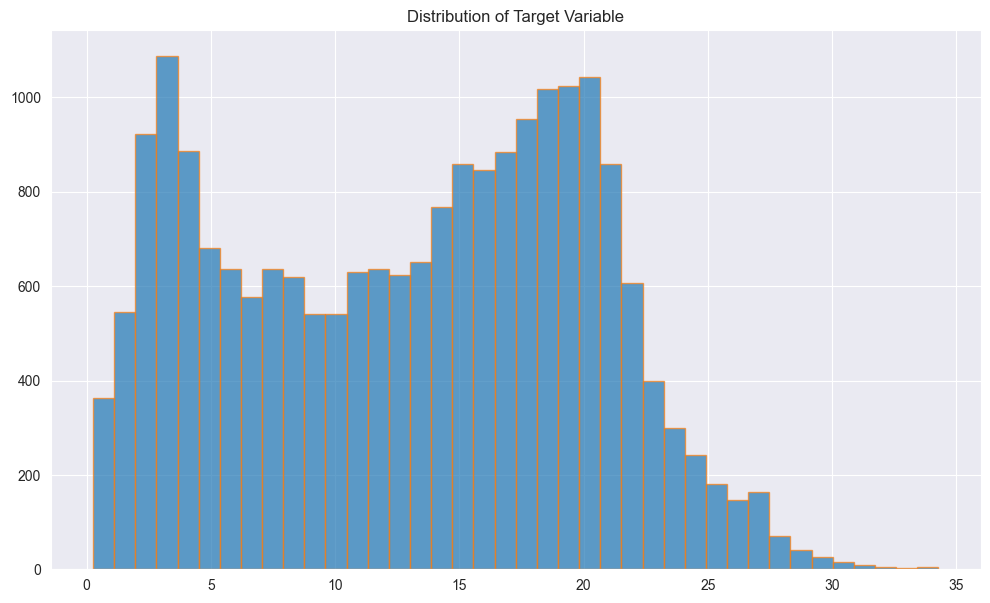

In [2]:
# Check the distribution of target variables
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
ax.set_title('Distribution of Target Variable')
ax.hist(sun_data_df['PolyPwr'], bins=40, density=False, facecolor="tab:blue", edgecolor="tab:orange", alpha=0.7)
plt.show()

Text(0.5, 1.0, 'Visualise missing values in datasets')

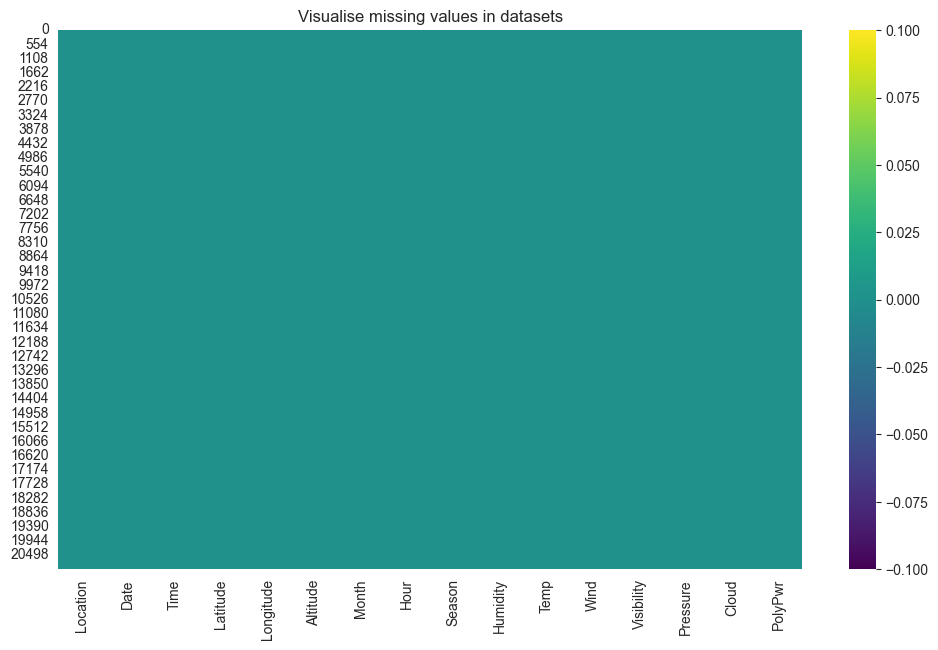

In [3]:
import seaborn as sns

# plot is null
plt.figure(figsize=(12, 7))
sns.heatmap(sun_data_df.isnull(), cmap='viridis')
plt.title('Visualise missing values in datasets')

In [5]:
# classify power class

class_arr = []
for i in sun_data_df['PolyPwr']:
    if i < 8:
        class_arr.append(1)
    elif i < 12:
        class_arr.append(2)
    elif i < 16:
        class_arr.append(3)
    elif i < 20:
        class_arr.append(4)
    elif i < 24:
        class_arr.append(5)
    else:
        class_arr.append(6)
sun_data_df['power_class'] = pd.Series(class_arr)

sun_data_df.head()

,Location,Date,Time,Latitude,Longitude,Altitude,Month,Hour,Season,Humidity,Temp,Wind,Visibility,Pressure,Cloud,PolyPwr,power_class
0,Camp Murray,2017-12-03,1145,47.11,-122.57,84,12,11,Winter,81.71997,12.86919,5,10.0,1010.6,722,2.42769,1
1,Camp Murray,2017-12-03,1315,47.11,-122.57,84,12,13,Winter,96.64917,9.66415,0,10.0,1011.3,23,2.46273,1
2,Camp Murray,2017-12-03,1330,47.11,-122.57,84,12,13,Winter,93.61572,15.44983,5,10.0,1011.6,32,4.46836,1
3,Camp Murray,2017-12-04,1230,47.11,-122.57,84,12,12,Winter,77.21558,10.36659,5,2.0,1024.4,6,1.65364,1
4,Camp Murray,2017-12-04,1415,47.11,-122.57,84,12,14,Winter,54.80347,16.85471,3,3.0,1023.7,9,6.57939,1


In [9]:
sun_data_df.to_csv('dataset_processed.csv')